<a href="https://colab.research.google.com/github/viniciusrpb/cic0269_natural_language_processing/blob/main/lectures/natural_language_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 12 - Redes Neurais Recorrentes

### Aplicação: Inferência de Linguagem Natural

Script que realiza a inferência de linguagem natural por meio de uma tarefa de classificação. Utilizam-se modelos de linguagem baseados em redes neurais recorrentes.

O dataset pode ser coletado no repositório do GitHub da disciplina ou no endereço a seguir:

https://www.tensorflow.org/datasets/catalog/snli

Adotaremos a segunda opção:

In [1]:
# !pip install tensorflow-datasets
# !pip install keras
# !pip install tensorflow

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Embedding,SimpleRNN,Dropout,LSTM
from tensorflow.keras.utils import to_categorical

c:\Users\lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Como o conjunto de treinamento é muito grande, vamos utilizar 50% de seu tamanho. Se os resultados de classificação não ajudarem, você pode aumentar esse tamanho...

In [3]:
ds_train = tfds.load('snli', split='train[50%:]', shuffle_files=True)
ds_valid = tfds.load('snli', split='validation', shuffle_files=False)
ds_test = tfds.load('snli', split='test', shuffle_files=False)

In [4]:
df_train = tfds.as_dataframe(ds_train)
df_valid = tfds.as_dataframe(ds_valid)
df_test = tfds.as_dataframe(ds_test)

In [5]:
df_train.head()

hypothesis  label  \
0                          b'A child reaches up.'      0   
1                     b'A person with a backpack'      0   
2         b'A man holding a hard hat is running.'      0   
3  b'A female in weird clothing holding a glass.'      0   
4                            b'There are bikers.'      0   

                                             premise  
0  b'a child reaches up into the air as a woman s...  
1  b'A young woman wearing a backpack takes the b...  
2  b'A man holding a hard hat runs across a street.'  
3   b'Woman wearing a costume, drinking a beverage.'  
4  b'A group of bikers head out the gates in a Lo...

Pré-processamento das sentenças do DataFrame do SNLI: remoção do prefixo b e concatenação da premissa e da hipótese em uma única sentença.

**Obs.:** Você pode fazer outros pré-processamentos (remoção de stop-words, stemmização, lemmatização etc)...

Segue uma proposta de pré-processamento. Thanks to Gabriel Nogueira:

In [6]:
def preprocessDataFrame(df):

    dic = {}
    dic['premise_hypothesis'] = []
    dic['label'] = []

    hypothesis = [x.decode('utf-8') for x in df['hypothesis'].values]
    premise = [x.decode('utf-8') for x in df['premise'].values]

    for idx,sentence in enumerate(premise):
        dic['premise_hypothesis'].append(premise[idx]+" "+hypothesis[idx])
        dic['label'].append(df['label'][idx])
        
    return pd.DataFrame.from_dict(dic)

In [7]:
df_train = preprocessDataFrame(df_train)
df_valid = preprocessDataFrame(df_valid)
df_test = preprocessDataFrame(df_test)

In [8]:
df_train.head()

premise_hypothesis  label
0  a child reaches up into the air as a woman sta...      0
1  A young woman wearing a backpack takes the blo...      0
2  A man holding a hard hat runs across a street....      0
3  Woman wearing a costume, drinking a beverage. ...      0
4  A group of bikers head out the gates in a Lond...      0

Criação dos logits

In [9]:
df_train['label'] = pd.Categorical(df_train['label'])
y_train_int = df_train['label'].cat.codes

df_valid['label'] = pd.Categorical(df_valid['label'])
y_valid_int = df_valid['label'].cat.codes

df_test['label'] = pd.Categorical(df_test['label'])
y_test_int = df_test['label'].cat.codes

y_train = to_categorical(y_train_int)
y_valid = to_categorical(y_valid_int)
y_test = to_categorical(y_test_int)

Numericalização e padding!

Homework :)

In [10]:
train_tweets = df_train['premise_hypothesis'].to_list()

vocabulary = {}
max_words = 0

for i in range(len(train_tweets)):
    curr_max_words = 0
    train_tweets[i] = train_tweets[i].lower()
    for word in train_tweets[i].split():
        curr_max_words += 1
        if word not in vocabulary:
            vocabulary[word] = 1
        else:
            vocabulary[word]+=1
    max_words = max(max_words, curr_max_words)

vocab_size = len(vocabulary)

tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(df_train['premise_hypothesis'])

In [11]:
X_train = tokenizer.texts_to_sequences(df_train['premise_hypothesis'])
X_valid = tokenizer.texts_to_sequences(df_valid['premise_hypothesis'])
X_test  = tokenizer.texts_to_sequences(df_test['premise_hypothesis'])

In [12]:
# max_words = 50
for data in [X_train, X_test, X_valid]:
  for j in range(len(data)):
    for i in range(len(data[j]), max_words):
      data[j].append(0)

    data[j] = list(data[j][:max_words])

In [13]:
for data in [X_train, X_test, X_valid]:
  for row in data:
    if len(row) != 50:
      print(len(row))

# X_train

112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112
112


In [14]:
X_train = np.array(X_train)
X_valid = np.array(X_valid)
X_test = np.array(X_test)

In [15]:
X_train

array([[   1,   44, 1211, ...,    0,    0,    0],
       [   1,   20,   11, ...,    0,    0,    0],
       [   1,    5,   43, ...,    0,    0,    0],
       ...,
       [   1,   11,   16, ...,    0,    0,    0],
       [   1,   24,    3, ...,    0,    0,    0],
       [   1,    5,   31, ...,    0,    0,    0]])

In [16]:
len(X_train[2])

112

In [17]:
model_rnn = Sequential()
model_rnn.add(Embedding(2000,output_dim=64))
model_rnn.add(SimpleRNN(64,activation='relu'))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(4,activation="softmax"))
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          128000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 4)                 260       
                                                                 
Total params: 136,516
Trainable params: 136,516
Non-trainable params: 0
_________________________________________________________________


In [18]:
model_lstm = Sequential()
model_lstm.add(Embedding(2000,output_dim=64))
# activation == tanh
# recurrent_activation == sigmoid
# recurrent_dropout == 0
# unroll is False
# use_bias is True
model_lstm.add(LSTM(1,return_sequences=True,activation='tanh', recurrent_activation="sigmoid", recurrent_dropout=0, unroll=False, use_bias=True,batch_input_shape=(None,1,20)))
model_lstm.add(LSTM(1,activation='tanh', recurrent_activation="sigmoid", recurrent_dropout=0, unroll=False, use_bias=True,batch_input_shape=(None,1,20)))
# model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(4,activation="softmax"))
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          128000    
                                                                 
 lstm (LSTM)                 (None, None, 1)           264       
                                                                 
 lstm_1 (LSTM)               (None, 1)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 8         
                                                                 
Total params: 128,284
Trainable params: 128,284
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_rnn.compile(optimizer="adam", loss="categorical_crossentropy")
model_lstm.compile(optimizer="adam", loss="categorical_crossentropy")

In [20]:
model_lstm.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
8597/8597 [==============================] - 100s 11ms/step - loss: 1.1199 - val_loss: 1.1860
Epoch 2/10
8597/8597 [==============================] - 95s 11ms/step - loss: 1.1078 - val_loss: 1.1853
Epoch 3/10
8597/8597 [==============================] - 95s 11ms/step - loss: 1.1078 - val_loss: 1.1872
Epoch 4/10
8597/8597 [==============================] - 96s 11ms/step - loss: 1.1078 - val_loss: 1.1864
Epoch 5/10
8597/8597 [==============================] - 95s 11ms/step - loss: 1.1078 - val_loss: 1.1864
Epoch 6/10
8597/8597 [==============================] - 94s 11ms/step - loss: 1.1078 - val_loss: 1.1863
Epoch 7/10
8597/8597 [==============================] - 96s 11ms/step - loss: 1.1078 - val_loss: 1.1865
Epoch 8/10
8597/8597 [==============================] - 96s 11ms/step - loss: 1.1078 - val_loss: 1.1862
Epoch 9/10
8597/8597 [==============================] - 95s 11ms/step - loss: 1.1078 - val_loss: 1.1865
Epoch 10/10
8597/8597 [==============================] - 95s 11

In [21]:
model_rnn.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
8597/8597 [==============================] - 467s 54ms/step - loss: 1.1126 - val_loss: 1.1874
Epoch 2/10
8597/8597 [==============================] - 468s 54ms/step - loss: 1.1092 - val_loss: 1.1820
Epoch 3/10
8597/8597 [==============================] - 468s 54ms/step - loss: 1.1086 - val_loss: 1.1842
Epoch 4/10
8597/8597 [==============================] - 466s 54ms/step - loss: 1.1082 - val_loss: 1.1926
Epoch 5/10
8597/8597 [==============================] - 467s 54ms/step - loss: 1.1081 - val_loss: 1.1864
Epoch 6/10
8597/8597 [==============================] - 465s 54ms/step - loss: 1.1079 - val_loss: 1.1835
Epoch 7/10
8597/8597 [==============================] - 467s 54ms/step - loss: 1.1079 - val_loss: 1.1874
Epoch 8/10
8597/8597 [==============================] - 843s 98ms/step - loss: 1.1078 - val_loss: 1.1832
Epoch 9/10
8597/8597 [==============================] - 1511s 176ms/step - loss: 1.1078 - val_loss: 1.1859
Epoch 10/10
8597/8597 [==============================

<AxesSubplot:>

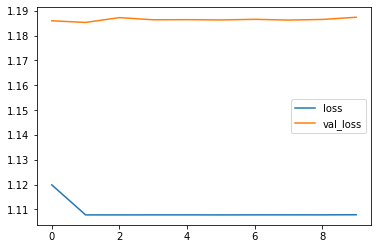

In [23]:
pd.DataFrame(model_lstm.history.history).plot()

<AxesSubplot:>

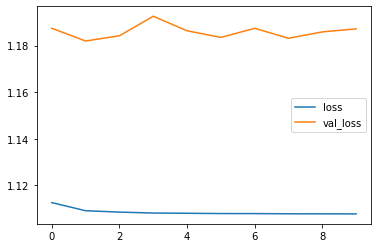

In [24]:
pd.DataFrame(model_rnn.history.history).plot()

In [28]:
predict_rnn = (model_rnn.predict(X_test)).argmax(axis=-1)
predict_lstm = (model_lstm.predict(X_test)).argmax(axis=-1)

313/313 [==============================] - 2s 5ms/step


In [33]:
from sklearn.metrics import classification_report

print(classification_report(predict_lstm, y_test.argmax(axis=-1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.32      0.49     10000

    accuracy                           0.32     10000
   macro avg       0.25      0.08      0.12     10000
weighted avg       1.00      0.32      0.49     10000



c:\Users\lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [34]:
print(classification_report(predict_rnn, y_test.argmax(axis=-1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.32      0.49     10000

    accuracy                           0.32     10000
   macro avg       0.25      0.08      0.12     10000
weighted avg       1.00      0.32      0.49     10000



c:\Users\lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lucas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r